In [1]:
from pathlib import Path
import numpy as np 
from PIL import Image

import tensorflow.keras as keras

import pandas as pd
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

2024-10-25 11:03:22.974508: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
CLASSES = ['Healthy', 'OC Degeneration']
input_stages = {'0': 'training', '1': 'validation_nodiag', '2': 'validation_noxai'}
BASEPATH = Path('/Users/djohnson/sciebo/1. Research/1. HCXAI/1. Projects/evalxai_studies/example_validation_study')

In [3]:
gdrive = Path('/Users/djohnson/Library/CloudStorage/GoogleDrive-fortjay81@gmail.com/My Drive')
samples_path = gdrive / 'hcxai' / 'blocky_diagnosis'

xai_samples_csv = samples_path / 'original_input' / ' nobias_model' / '2024-10-17' / f'xai_samples' / 'xai_samples_df.csv'
df_xai_samples = pd.read_csv(xai_samples_csv )

In [4]:
data_dir_sickones = keras.utils.get_file(
    origin = "file:///Users/djohnson/sciebo/1. Research/1. HCXAI/1. Projects/two4two_datasets/two4two_datasets.tar.gz",
    fname = 'two4two_datasets.tar.gz',
    extract = True,
    archive_format = 'tar', 
    # force_download = False
)
data_dir_sickones = Path(data_dir_sickones)
data_dir_sickones

In [5]:
nobias_dir = data_dir_sickones.with_suffix('').with_suffix('') / 'sick_ones_bendbias'
nobias_dir

PosixPath('/Users/djohnson/.keras/datasets/two4two_datasets/sick_ones_bendbias')

In [7]:
df_sets = pd.read_csv('../sample_orders.csv')
df_sets

,Unnamed: 0,id,stage_name
0,0,611758ba-6e77-4323-8a4b-d203715777b7,0
1,1,bab2c129-8c7d-49bb-bb02-84c08581915a,0
2,2,2bad203e-f391-40f9-8c6b-846efdafc0e1,0
3,3,39a16ba0-29b6-49fc-87c3-f533d09e5ca9,0
4,4,22247dcf-453b-41ec-87c8-d5de824346b6,0
...,...,...,...
89,89,0468f18c-b0d7-4fd2-b059-d407306d1515,2
90,90,4b1c108d-8b62-4e1e-b774-cc923a888799,2
91,91,c8a777a2-4067-406e-a1ec-d93de720c4bc,2
92,92,0dfbb095-b0cd-498e-a01a-787015aa630b,2


In [8]:
df_sets[df_sets['stage_name'] == 1].tail(10)

,Unnamed: 0,id,stage_name
42,42,bd24d25d-9619-47ad-aa50-7929742b5a10,1
43,43,0a171071-b821-4f37-8cfe-9fec6b34391a,1
44,44,03a5305d-4f64-4f9a-81da-d3da889cfd3c,1
45,45,768159d9-8da4-4004-8ca5-b40a0969ae53,1
46,46,5aed3aae-857b-4fde-bd39-fa7a9a784b8e,1
47,47,0dfbb095-b0cd-498e-a01a-787015aa630b,1
48,48,4b1c108d-8b62-4e1e-b774-cc923a888799,1
49,49,c8a777a2-4067-406e-a1ec-d93de720c4bc,1
50,50,98d2595f-3c33-4701-afea-fff5b586127d,1
51,51,4f383912-0ee6-4bc2-a82f-4be6f9514713,1


In [10]:
df_sets[df_sets['stage_name'] == 2].head(10)

,Unnamed: 0,id,stage_name
84,84,680ff6d7-2bbd-4915-92b4-7fbebb5c2798,2
85,85,85268050-f38c-41a7-bf0a-1b94941a1ec5,2
86,86,bd24d25d-9619-47ad-aa50-7929742b5a10,2
87,87,357d18e9-52a7-4c39-aab6-9fe6cedd0571,2
88,88,0035c5bb-5704-4a5a-9f53-dea0b9513ba6,2
89,89,0468f18c-b0d7-4fd2-b059-d407306d1515,2
90,90,4b1c108d-8b62-4e1e-b774-cc923a888799,2
91,91,c8a777a2-4067-406e-a1ec-d93de720c4bc,2
92,92,0dfbb095-b0cd-498e-a01a-787015aa630b,2
93,93,ea501f43-ff31-47e4-939e-64a05101b8a5,2


In [11]:
def get_image(id):
  f_path = nobias_dir / 'test' / df_xai_samples.loc[df_xai_samples.id == id, 'filename'].values[0]
  image = np.array(Image.open(f_path).convert('RGB')) * 1. / 255
  return image

In [19]:
df_1 = df_sets[df_sets['stage_name'] == 1].tail(10)
imgs_1 = {s.id: get_image(s.id) for _, s in df_1.iterrows()}

df_2 = df_sets[df_sets['stage_name'] == 2].tail(10)
imgs_2 = {s.id: get_image(s.id) for _, s in df_2.iterrows()}

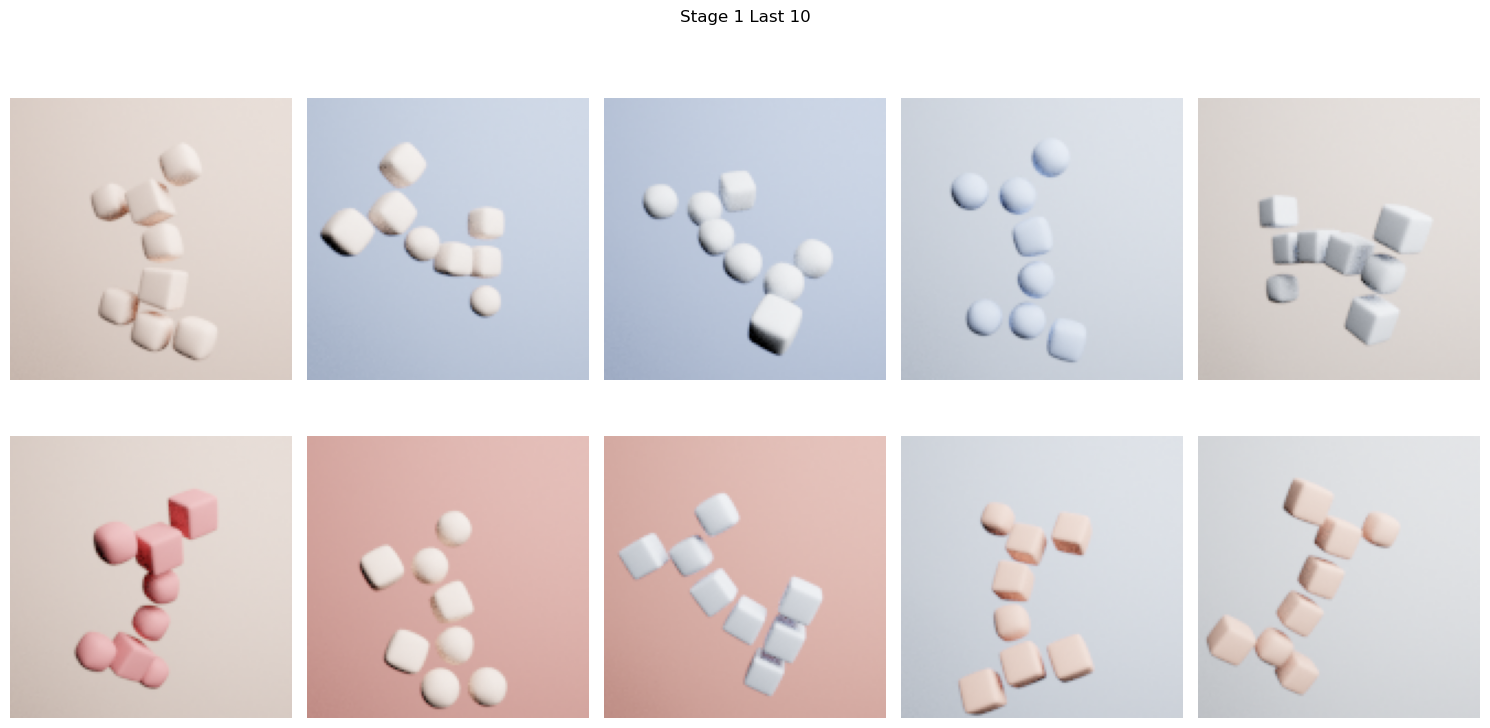

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

for ax, (id, img) in zip(axes.flatten(), imgs_1.items()):
    ax.imshow(img)
    # ax.set_title(f'Model: {model} | Actual: {actual}')
    ax.axis('off')
plt.suptitle('Stage 1 Last 10')
plt.tight_layout()

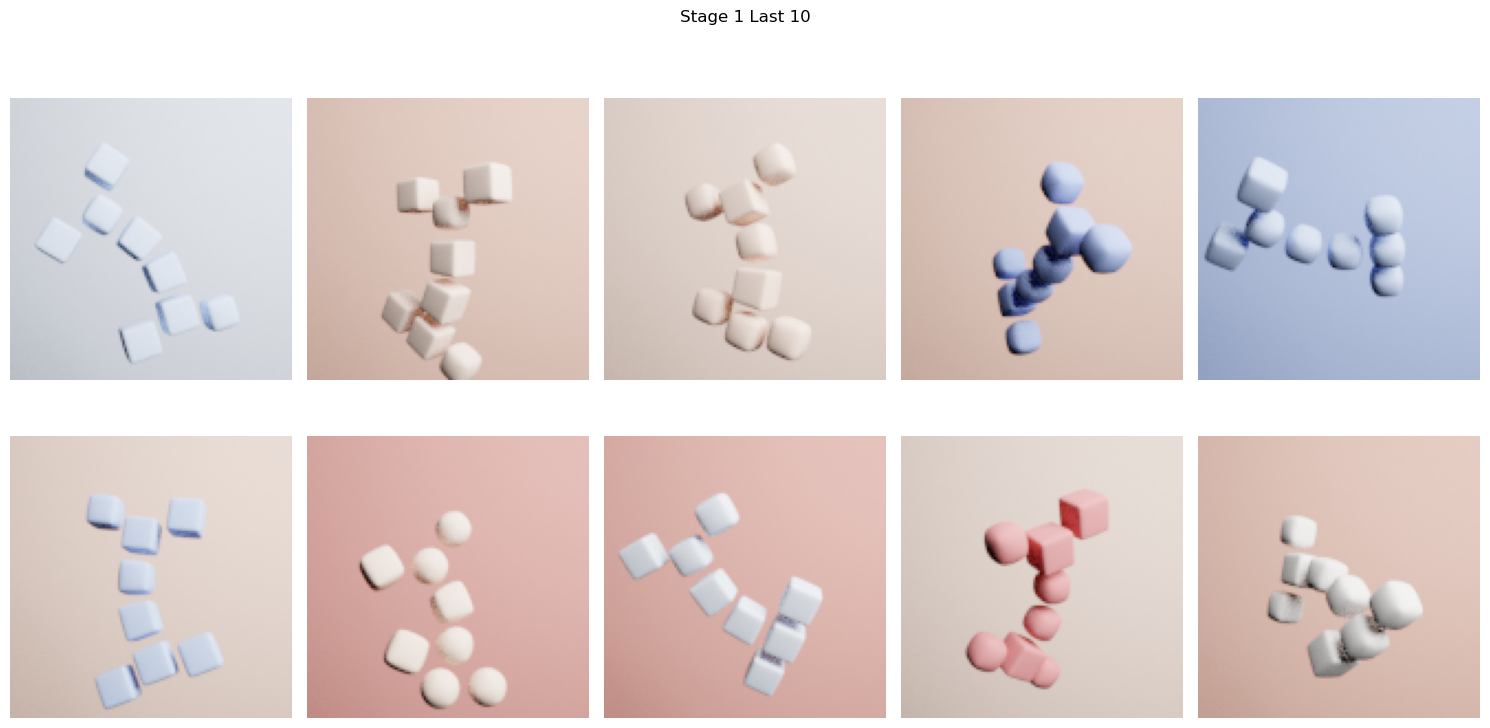

In [21]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

for ax, (id, img) in zip(axes.flatten(), imgs_2.items()):
    ax.imshow(img)
    # ax.set_title(f'Model: {model} | Actual: {actual}')
    ax.axis('off')
plt.suptitle('Stage 1 Last 10')
plt.tight_layout()